In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [3]:
# 1. Загрузка данных
df = pd.read_csv('BTCUSDC_2025-12-09.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)
series = df['price']

# Ресэмплинг на 1 минуту (средняя цена)
series_min = series.resample('1min').mean().dropna()

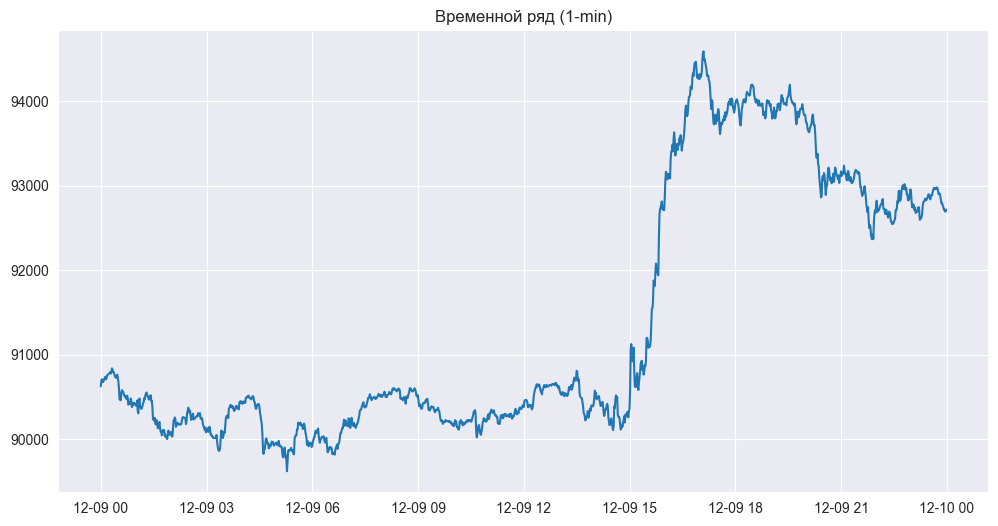

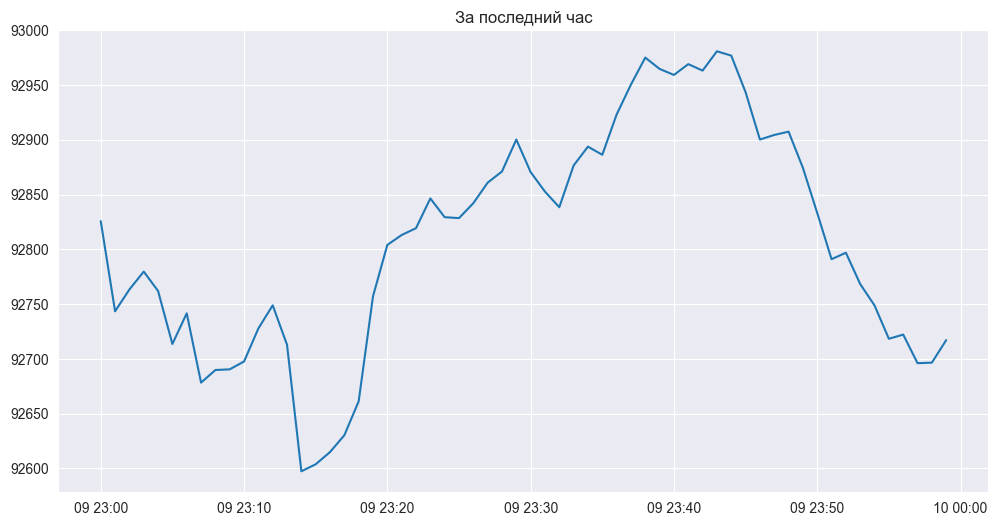

In [4]:
# 2. График ряда
plt.figure(figsize=(12, 6))
plt.plot(series_min)
plt.title('Временной ряд (1-min)')
plt.show()

# График за "год" (весь день) - выше
# За "квартал" (последний час)
plt.figure(figsize=(12, 6))
plt.plot(series_min[-60:])
plt.title('За последний час')
plt.show()

# Аналогично для 15 мин (-15) и 5 мин (-5)


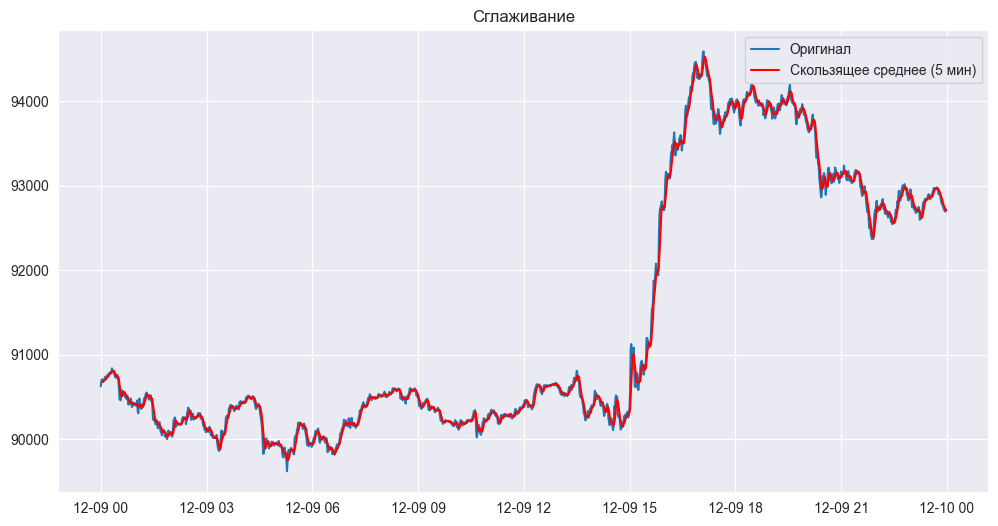

In [5]:
# 3. Скользящее среднее
rolling_mean = series_min.rolling(window=5).mean()
plt.figure(figsize=(12, 6))
plt.plot(series_min, label='Оригинал')
plt.plot(rolling_mean, color='red', label='Скользящее среднее (5 мин)')
plt.title('Сглаживание')
plt.legend()
plt.show()


In [6]:
# 4. Стационарность (ADF тест)
adf_result = adfuller(series_min)
print(f'ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}')

ADF Statistic: -0.7683459742554898, p-value: 0.8282438577676079


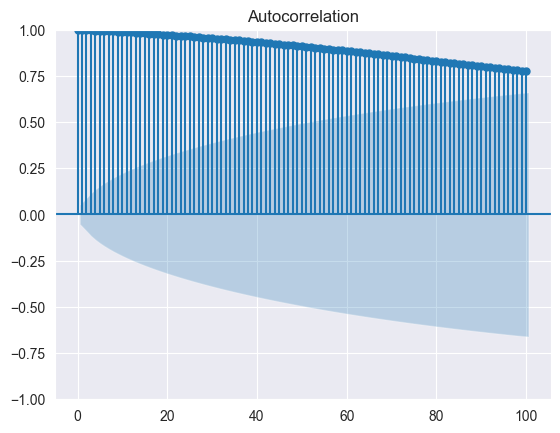

In [11]:

# 5. ACF
plot_acf(series_min, lags=100)
plt.show()

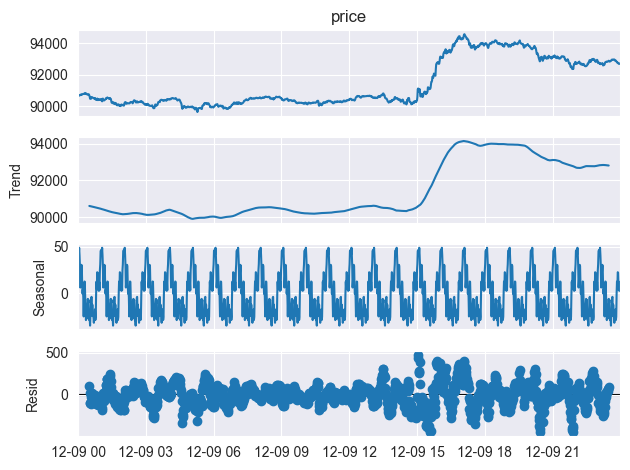

In [8]:

# 6. Декомпозиция (period=60 для hourly)
decomp = seasonal_decompose(series_min, period=60)
decomp.plot()
plt.show()

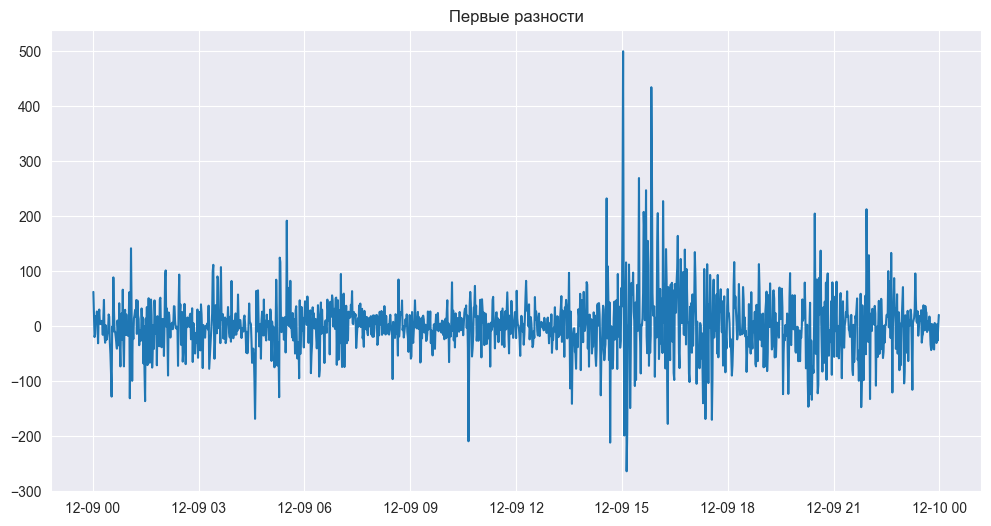

ADF for diff: -10.034370998774554, p-value: 1.5546576619163963e-17


In [9]:
# 7. Первые разности
diff = series_min.diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(diff)
plt.title('Первые разности')
plt.show()

adf_diff = adfuller(diff)
print(f'ADF for diff: {adf_diff[0]}, p-value: {adf_diff[1]}')